# Youtube Data Cleaning & Preprocessing

Data Cleaning
1. 비디오 아이디가 a_k-dCgubFo 인 데이터들을 지운다.
2. 중복된 비디오가 있는지 체크한다. 그리고 중복되었으면 지운다.
3. 구독자수가 0 인 데이터들을 지운다.

Data Preprocessing
1. Metric 계산하기
- 조회수 나누기 구독자수.
- 중앙값보다 크면 1, 작으면 0
2. 스페셜 캐릭터들 제거하기.
3. 숫자 제거하기.
4. 데이터 추출.

In [ ]:
# 필요한 라이브러리들 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

In [ ]:
# 데이터 가져오기
data_df = pd.read_csv("/content/drive/MyDrive/youtube_scraping/data_scraped_final.csv", header=0, index_col=False)
data_df.head()

,Title,VideoID,ChannelID,Views,SubsCount
0,"이 세상 모든 여행기 몰아보기 [걸리버여행기, 열하일기, 하멜표류기, 박정양, 이와...",GxHm11CIeE4,UCfU5N61VKvMJUsUzfaqk0Hg,100642,520000
1,여행기 ((TVXQ Solo) [Bonus Track]),lEGY5zffY0c,UCOcwGi78fdHWhAK-bGnNgCw,191394,190000
2,캐럿맨 여행기 Carrot man,a_k-dCgubFo,UC_4hHKHUcs9bGpl_zDAOxvg,4264287,457000
3,"이나영,구교환,박세완,심은경,한예리,신현지 등 초호화 캐스팅으로 나오자마자 미친 떡...",iQPTxgIOMPM,UCD3TQB9--RP2sYeDjcrLYGw,163480,235000
4,한국인 혼자 벨기에 수도를 여행하면 일어나는 재밌는 일들 - 베네룩스(1) 🇧🇪,MVodSCFovPk,UC_4hHKHUcs9bGpl_zDAOxvg,1266511,457000


In [ ]:
# 구독자 수가 0인 데이터가 있는지 살펴보기
data_df[data_df.SubsCount == 0]

,Title,VideoID,ChannelID,Views,SubsCount


In [ ]:
# 조회수가 0인 데이터가 있는지 살펴보기
data_df[data_df.Views == 0]

,Title,VideoID,ChannelID,Views,SubsCount


In [ ]:
# 중복된 데이터가 있는지 살펴보기
data_df[data_df.VideoID.duplicated()]

,Title,VideoID,ChannelID,Views,SubsCount
41,정찬성 Korean Zombie,a_k-dCgubFo,UCc7o0OkR2BDFN4TCgPChjEw,4264287,1100000
44,트립콤파니,a_k-dCgubFo,UC0EQX5Z2TlaKeIw4O3ieZAQ,4264287,224000
75,배낭여행자 민[Traveler Min],a_k-dCgubFo,UChMYkut7VH7hz2NgW8xA2Mg,4264287,21800
86,배낭만,a_k-dCgubFo,UCTwTHi57e5_m6tSLaOa0bRg,4264287,615
124,런던혜원,a_k-dCgubFo,UCENBS70Jei66SEtlDTKB4-Q,4264287,26600
150,서울시 · Seoul,a_k-dCgubFo,UCZUPZW5idAxYp-Asj__lVAA,4264287,196000
158,Seoul Walker,a_k-dCgubFo,UCSZXwdBppzhYpcqf69WNOIg,4264287,398000
180,하루살기,a_k-dCgubFo,UCniBqAPwwWIQLbYo4uK2RWg,4264287,1140000
183,하루살기,a_k-dCgubFo,UCIAH4FXl2DQ4HmLupsyFiug,4264287,3350000
210,초원 : 청년 크리스천 대표 플랫폼,a_k-dCgubFo,UCLJi5xP-S2XpBNV9kFZYHXg,4264287,12600


In [ ]:
# 필요없는 데이터 지우기(데이터 클리닝)
data_df = data_df.drop(data_df[data_df.VideoID.duplicated()].index)
data_df = data_df.drop(data_df[data_df.VideoID == "a_k-dCgubFo"].index)
data_df = data_df.drop(data_df[data_df.SubsCount == 0].index)
data_df = data_df.drop(data_df[data_df.Views == 0].index)

data_df.shape

(434, 5)

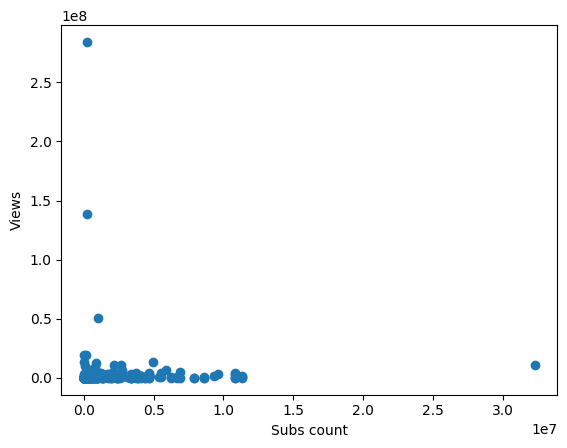

In [ ]:
# 데이터 시각화 구독자 수 대비 조회수
plt.scatter(data_df.SubsCount, data_df.Views)
plt.xlabel("Subs count")
plt.ylabel("Views")
plt.show(_)

## Data Preprocessing (데이터 전처리)
1. Metric 계산하기
 - Views 를 SubsCount로 나누는 계산
 - 중앙값을 계산하고, 중앙값보다 크면 1, 작으면 0으로 assign 한다.
2. 스페셜 캐릭터들 제거하기.
3. 데이터 추출



In [ ]:
x_min = data_df.Views.min()
x_max = data_df.Views.max()

print(x_min, x_max)

data_df["Views_to_Subs"] = data_df.Views/data_df.SubsCount
data_df.head()

4 284114004


,Title,VideoID,ChannelID,Views,SubsCount,Views_to_Subs
0,"이 세상 모든 여행기 몰아보기 [걸리버여행기, 열하일기, 하멜표류기, 박정양, 이와...",GxHm11CIeE4,UCfU5N61VKvMJUsUzfaqk0Hg,100642,520000,0.193542
1,여행기 ((TVXQ Solo) [Bonus Track]),lEGY5zffY0c,UCOcwGi78fdHWhAK-bGnNgCw,191394,190000,1.007337
3,"이나영,구교환,박세완,심은경,한예리,신현지 등 초호화 캐스팅으로 나오자마자 미친 떡...",iQPTxgIOMPM,UCD3TQB9--RP2sYeDjcrLYGw,163480,235000,0.695660
4,한국인 혼자 벨기에 수도를 여행하면 일어나는 재밌는 일들 - 베네룩스(1) 🇧🇪,MVodSCFovPk,UC_4hHKHUcs9bGpl_zDAOxvg,1266511,457000,2.771359
5,동방신기) &#39;여행기&#39; (Traveling) Open Concert LIVE,5U3aZGZKxNM,UCN1BY5tIbuJoV4KYxbiB6Yg,26525,24200,1.096074


In [ ]:
# 중앙값 찾아내기
views_median = data_df.Views_to_Subs.median()
views_median

0.8099493888409548

In [ ]:
# Target (Label) 지정하기
def make_target(data, median) :
  inside_target = []
  for ratio in data:
    if ratio > median :
      inside_target.append(1)
    else:
      inside_target.append(0)
  return inside_target

target = make_target(data_df.Views_to_Subs, views_median)
print(f"10개 정도 한번 보기 : {target[:10]}")

10개 정도 한번 보기 : [0, 1, 0, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# 데이터 프레임에 Target values 넣기
data_df["Target"] = target
data_df.head(10)

,Title,VideoID,ChannelID,Views,SubsCount,Views_to_Subs,Target
0,"이 세상 모든 여행기 몰아보기 [걸리버여행기, 열하일기, 하멜표류기, 박정양, 이와...",GxHm11CIeE4,UCfU5N61VKvMJUsUzfaqk0Hg,100642,520000,0.193542,0
1,여행기 ((TVXQ Solo) [Bonus Track]),lEGY5zffY0c,UCOcwGi78fdHWhAK-bGnNgCw,191394,190000,1.007337,1
3,"이나영,구교환,박세완,심은경,한예리,신현지 등 초호화 캐스팅으로 나오자마자 미친 떡...",iQPTxgIOMPM,UCD3TQB9--RP2sYeDjcrLYGw,163480,235000,0.695660,0
4,한국인 혼자 벨기에 수도를 여행하면 일어나는 재밌는 일들 - 베네룩스(1) 🇧🇪,MVodSCFovPk,UC_4hHKHUcs9bGpl_zDAOxvg,1266511,457000,2.771359,1
5,동방신기) &#39;여행기&#39; (Traveling) Open Concert LIVE,5U3aZGZKxNM,UCN1BY5tIbuJoV4KYxbiB6Yg,26525,24200,1.096074,1
6,"&quot;빠니보틀, 그는 신인가?&quot; 웃돈 주고라도 가야 할 북해도 렌터카...",hJ4WWLeSSCY,UC0VR2v4TZeGcOrZHnmwbU_Q,1168863,1170000,0.999028,1
7,요상한 나라 부탄 여행기 【부탄1】,2kRMfWK11W0,UCNhofiqfw5nl-NeDJkXtPvw,2282466,2070000,1.102641,1
8,"[vlog] 마지막 액티비티를 즐기다, 롱테일보트｜라오스 여행기 4박6일｜EP.7",CNiIV4cL3ms,UCIEoKOTvRUPYd_Wn95zBUbg,452,164,2.756098,1
9,탈모와 뚱보와 털보의 여행기 【베트남1】,QYGJ-Zcma4Q,UCNhofiqfw5nl-NeDJkXtPvw,5183272,2070000,2.503996,1
10,★[걸리버 여행기] 설민석 강독 풀버전★ 동화? NO! 발간 직후 금서로 지정된 문...,6nloQ8rPgkc,UCR9gReM5VhQ_8brqQrBaVCA,1526650,795000,1.920314,1


In [ ]:
data_df.Target.value_counts()

0    217
1    217
Name: Target, dtype: int64

In [ ]:
len(data_df)

434

In [ ]:
# 스페셜 캐릭터 지우기
def process_titles(titles):
  processed_titles = []
  for title in titles:
    sample_title = re.compile('[ㄱ-ㅎ가-힣a-zA-Z0-9]+').findall(title)
    sample_title=" ".join(sample_title)
    processed_titles.append(sample_title)

  return processed_titles

cleaned_titles = process_titles(data_df.Title)
data_df["Cleaned_Titles"] = cleaned_titles
data_df.head()

,Title,VideoID,ChannelID,Views,SubsCount,Views_to_Subs,Target,Cleaned_Titles
0,"이 세상 모든 여행기 몰아보기 [걸리버여행기, 열하일기, 하멜표류기, 박정양, 이와...",GxHm11CIeE4,UCfU5N61VKvMJUsUzfaqk0Hg,100642,520000,0.193542,0,이 세상 모든 여행기 몰아보기 걸리버여행기 열하일기 하멜표류기 박정양 이와쿠라 사절...
1,여행기 ((TVXQ Solo) [Bonus Track]),lEGY5zffY0c,UCOcwGi78fdHWhAK-bGnNgCw,191394,190000,1.007337,1,여행기 TVXQ Solo Bonus Track
3,"이나영,구교환,박세완,심은경,한예리,신현지 등 초호화 캐스팅으로 나오자마자 미친 떡...",iQPTxgIOMPM,UCD3TQB9--RP2sYeDjcrLYGw,163480,235000,0.695660,0,이나영 구교환 박세완 심은경 한예리 신현지 등 초호화 캐스팅으로 나오자마자 미친 떡...
4,한국인 혼자 벨기에 수도를 여행하면 일어나는 재밌는 일들 - 베네룩스(1) 🇧🇪,MVodSCFovPk,UC_4hHKHUcs9bGpl_zDAOxvg,1266511,457000,2.771359,1,한국인 혼자 벨기에 수도를 여행하면 일어나는 재밌는 일들 베네룩스 1
5,동방신기) &#39;여행기&#39; (Traveling) Open Concert LIVE,5U3aZGZKxNM,UCN1BY5tIbuJoV4KYxbiB6Yg,26525,24200,1.096074,1,동방신기 39 여행기 39 Traveling Open Concert LIVE


In [ ]:
# 데이터 출력
cleaned_data = pd.DataFrame({"Titles": data_df.Cleaned_Titles,
                             "Target": data_df.Target})
cleaned_data.head()

,Titles,Target
0,이 세상 모든 여행기 몰아보기 걸리버여행기 열하일기 하멜표류기 박정양 이와쿠라 사절...,0
1,여행기 TVXQ Solo Bonus Track,1
3,이나영 구교환 박세완 심은경 한예리 신현지 등 초호화 캐스팅으로 나오자마자 미친 떡...,0
4,한국인 혼자 벨기에 수도를 여행하면 일어나는 재밌는 일들 베네룩스 1,1
5,동방신기 39 여행기 39 Traveling Open Concert LIVE,1


In [ ]:
len(cleaned_data)

434

In [ ]:
# 데이터 export
cleaned_data.to_csv("/content/drive/MyDrive/youtube_scraping/cleaned_data.csv", index=False)

In [ ]:
data_df.to_csv("/content/drive/MyDrive/youtube_scraping/preprocessed_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')